# Neighborhood-Based Housing Sales Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_excel("dataset.xlsx")

In [3]:
data.head()

,İSİM,İLAN TARİHİ,EMLAK TİPİ,M2 (BRÜT),M2 (NET),ODA SAYISI,BİNA YAŞI,BULUNDUĞU KAT,KAT SAYISI,ISITMA,FİYAT,İLÇE,MAHALLE,KİMDEN,TELEFON NUMARASI 1,İLAN LİNKİ
0,rahimehatun mah salı pazarı Türkoğlu cami civa...,31 Ocak 2022,Satılık Daire,180,170,5,7.5,1,5,Doğalgaz (Kombi),575.0,Merkez,İstiklal Mh.,Kat İrtifaklı,NaN,https://www.sahibinden.com/ilan/emlak-konut-sa...
1,ŞEHİR MERKEZİNDE 147 M² 3+1 ULTRA LUX DAİRE,31 Ocak 2022,Satılık Daire,147,130,4,0.0,4,5,Yerden Isıtma,695.0,Merkez,İstiklal Mh.,Kat Mülkiyetli,\n0 (552) 005 68 14,https://www.sahibinden.com/ilan/emlak-konut-sa...
2,YENER TUNCER DEN SATILIK LÜX DAIRE,30 Ocak 2022,Satılık Daire,175,165,5,0.0,7,7,Doğalgaz (Kombi),850.0,Merkez,İstiklal Mh.,Kat Mülkiyetli,\n0 (553) 913 20 02,https://www.sahibinden.com/ilan/emlak-konut-sa...
3,POLATTAN SATILIK 3+DAİRE,28 Ocak 2022,Satılık Daire,180,170,4,7.5,1,5,Doğalgaz (Kombi),465.0,Merkez,İstiklal Mh.,Kat Mülkiyetli,\n0 (546) 230 20 13,https://www.sahibinden.com/ilan/emlak-konut-sa...
4,Beyaz'dan İstikla Mah. SATILIK 4+1(155m2) Açık...,25 Ocak 2022,Satılık Daire,155,138,5,0.0,6,9,Doğalgaz (Kombi),860.0,Merkez,İstiklal Mh.,Kat İrtifaklı,\n0 (545) 396 76 51,https://www.sahibinden.com/ilan/emlak-konut-sa...


## Eksik verilerin tespit edilmesi.

### Toplam null değerileri hangi alanda kaç adet hesaplıyoruz.

In [4]:
data.isnull().sum()

İSİM                  0
İLAN TARİHİ           0
EMLAK TİPİ            0
M2 (BRÜT)             0
M2 (NET)              0
ODA SAYISI            0
BİNA YAŞI             0
BULUNDUĞU KAT         0
KAT SAYISI            0
ISITMA                0
FİYAT                 0
İLÇE                  0
MAHALLE               0
KİMDEN                0
TELEFON NUMARASI 1    3
İLAN LİNKİ            0
dtype: int64

## null değerlerin sabit bir değer almasını sağlıyoruz.

In [9]:
cleanData = data.fillna(0)

In [10]:
cleanData.isnull().sum()

İSİM                  0
İLAN TARİHİ           0
EMLAK TİPİ            0
M2 (BRÜT)             0
M2 (NET)              0
ODA SAYISI            0
BİNA YAŞI             0
BULUNDUĞU KAT         0
KAT SAYISI            0
ISITMA                0
FİYAT                 0
İLÇE                  0
MAHALLE               0
KİMDEN                0
TELEFON NUMARASI 1    0
İLAN LİNKİ            0
dtype: int64

## Datamız içinde kaç veri ve özellik var bakacağız.

#### 43 veri 16 kolon yani özellik olduğu görülüyor.

In [38]:
cleanData.shape

(43, 16)

## Index hatası incelemesi

#### Ulaştığımız sonuca göre index atlaması vb. hata gözükmemektedir.

In [39]:
cleanData.index

RangeIndex(start=0, stop=43, step=1)

## Kolon incelemesi

#### Datamızda ki kolon(özellik) adları tespiti.

In [41]:
cleanData.columns

Index(['İSİM', 'İLAN TARİHİ', 'EMLAK TİPİ', 'M2 (BRÜT)', 'M2 (NET)',
       'ODA SAYISI', 'BİNA YAŞI', 'BULUNDUĞU KAT', 'KAT SAYISI', 'ISITMA',
       'FİYAT', 'İLÇE', 'MAHALLE', 'KİMDEN', 'TELEFON NUMARASI 1',
       'İLAN LİNKİ'],
      dtype='object')

## Veri tipi incelemesi

#### Hangi özelliğimiz hangi tipe ait bakıyoruz.

In [43]:
cleanData.dtypes

İSİM                   object
İLAN TARİHİ            object
EMLAK TİPİ             object
M2 (BRÜT)               int64
M2 (NET)                int64
ODA SAYISI              int64
BİNA YAŞI             float64
BULUNDUĞU KAT           int64
KAT SAYISI              int64
ISITMA                 object
FİYAT                 float64
İLÇE                   object
MAHALLE                object
KİMDEN                 object
TELEFON NUMARASI 1     object
İLAN LİNKİ             object
dtype: object

In [51]:
# kaç farklı değer var incelemesi.
cleanData.nunique()

İSİM                  41
İLAN TARİHİ           23
EMLAK TİPİ             1
M2 (BRÜT)             24
M2 (NET)              22
ODA SAYISI             5
BİNA YAŞI              7
BULUNDUĞU KAT          7
KAT SAYISI             6
ISITMA                 6
FİYAT                 34
İLÇE                   1
MAHALLE                1
KİMDEN                 3
TELEFON NUMARASI 1    30
İLAN LİNKİ            41
dtype: int64

In [53]:
# her bir özelliğe ait toplam kaç değer var incelemesi
cleanData.count()

İSİM                  43
İLAN TARİHİ           43
EMLAK TİPİ            43
M2 (BRÜT)             43
M2 (NET)              43
ODA SAYISI            43
BİNA YAŞI             43
BULUNDUĞU KAT         43
KAT SAYISI            43
ISITMA                43
FİYAT                 43
İLÇE                  43
MAHALLE               43
KİMDEN                43
TELEFON NUMARASI 1    43
İLAN LİNKİ            43
dtype: int64

In [56]:
# Aynı değerden kaç adet var?
print(cleanData["FİYAT"].value_counts())

625.0    4
575.0    2
600.0    2
624.0    2
310.0    2
650.0    2
485.0    2
520.0    1
350.0    1
515.0    1
700.0    1
735.0    1
850.0    1
549.0    1
230.0    1
465.0    1
335.0    1
259.0    1
750.0    1
320.0    1
265.0    1
545.0    1
370.0    1
550.0    1
695.0    1
860.0    1
245.0    1
460.0    1
480.0    1
359.0    1
360.0    1
495.0    1
620.0    1
499.0    1
Name: FİYAT, dtype: int64


In [57]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   İSİM                43 non-null     object 
 1   İLAN TARİHİ         43 non-null     object 
 2   EMLAK TİPİ          43 non-null     object 
 3   M2 (BRÜT)           43 non-null     int64  
 4   M2 (NET)            43 non-null     int64  
 5   ODA SAYISI          43 non-null     int64  
 6   BİNA YAŞI           43 non-null     float64
 7   BULUNDUĞU KAT       43 non-null     int64  
 8   KAT SAYISI          43 non-null     int64  
 9   ISITMA              43 non-null     object 
 10  FİYAT               43 non-null     float64
 11  İLÇE                43 non-null     object 
 12  MAHALLE             43 non-null     object 
 13  KİMDEN              43 non-null     object 
 14  TELEFON NUMARASI 1  43 non-null     object 
 15  İLAN LİNKİ          43 non-null     object 
dtypes: float64

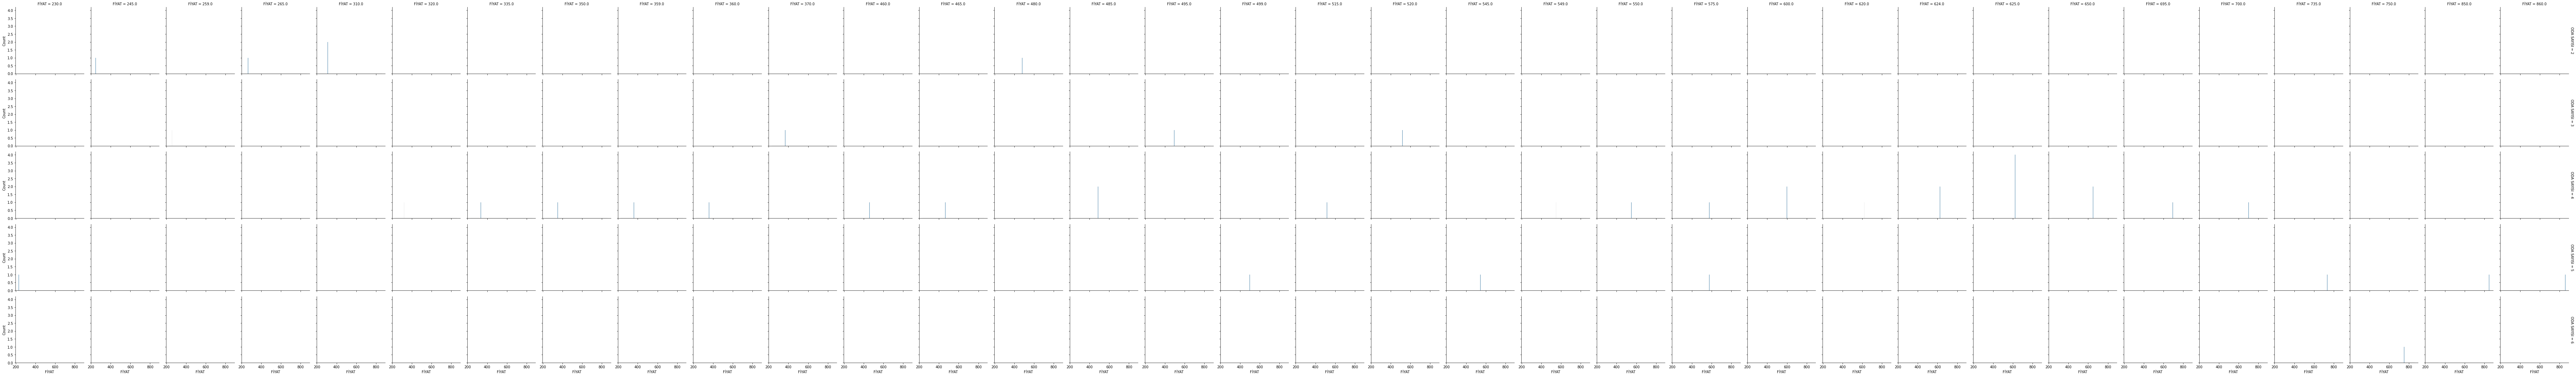

In [62]:
sbn.displot(
    cleanData, x="FİYAT", col="FİYAT", row="ODA SAYISI",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

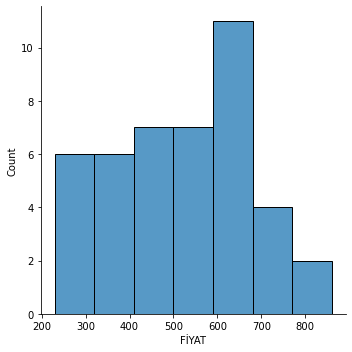

In [69]:
sbn.displot(cleanData["FİYAT"])

In [63]:
cleanData.corr()

,M2 (BRÜT),M2 (NET),ODA SAYISI,BİNA YAŞI,BULUNDUĞU KAT,KAT SAYISI,FİYAT
M2 (BRÜT),1.000000,0.978866,0.889566,0.336466,0.159519,-0.069470,0.428977
M2 (NET),0.978866,1.000000,0.907788,0.336887,0.102769,-0.077437,0.432769
ODA SAYISI,0.889566,0.907788,1.000000,0.215361,0.169134,0.149869,0.577187
BİNA YAŞI,0.336466,0.336887,0.215361,1.000000,-0.122521,-0.499678,-0.510335
BULUNDUĞU KAT,0.159519,0.102769,0.169134,-0.122521,1.000000,0.346237,0.387011
KAT SAYISI,-0.069470,-0.077437,0.149869,-0.499678,0.346237,1.000000,0.567283
FİYAT,0.428977,0.432769,0.577187,-0.510335,0.387011,0.567283,1.000000


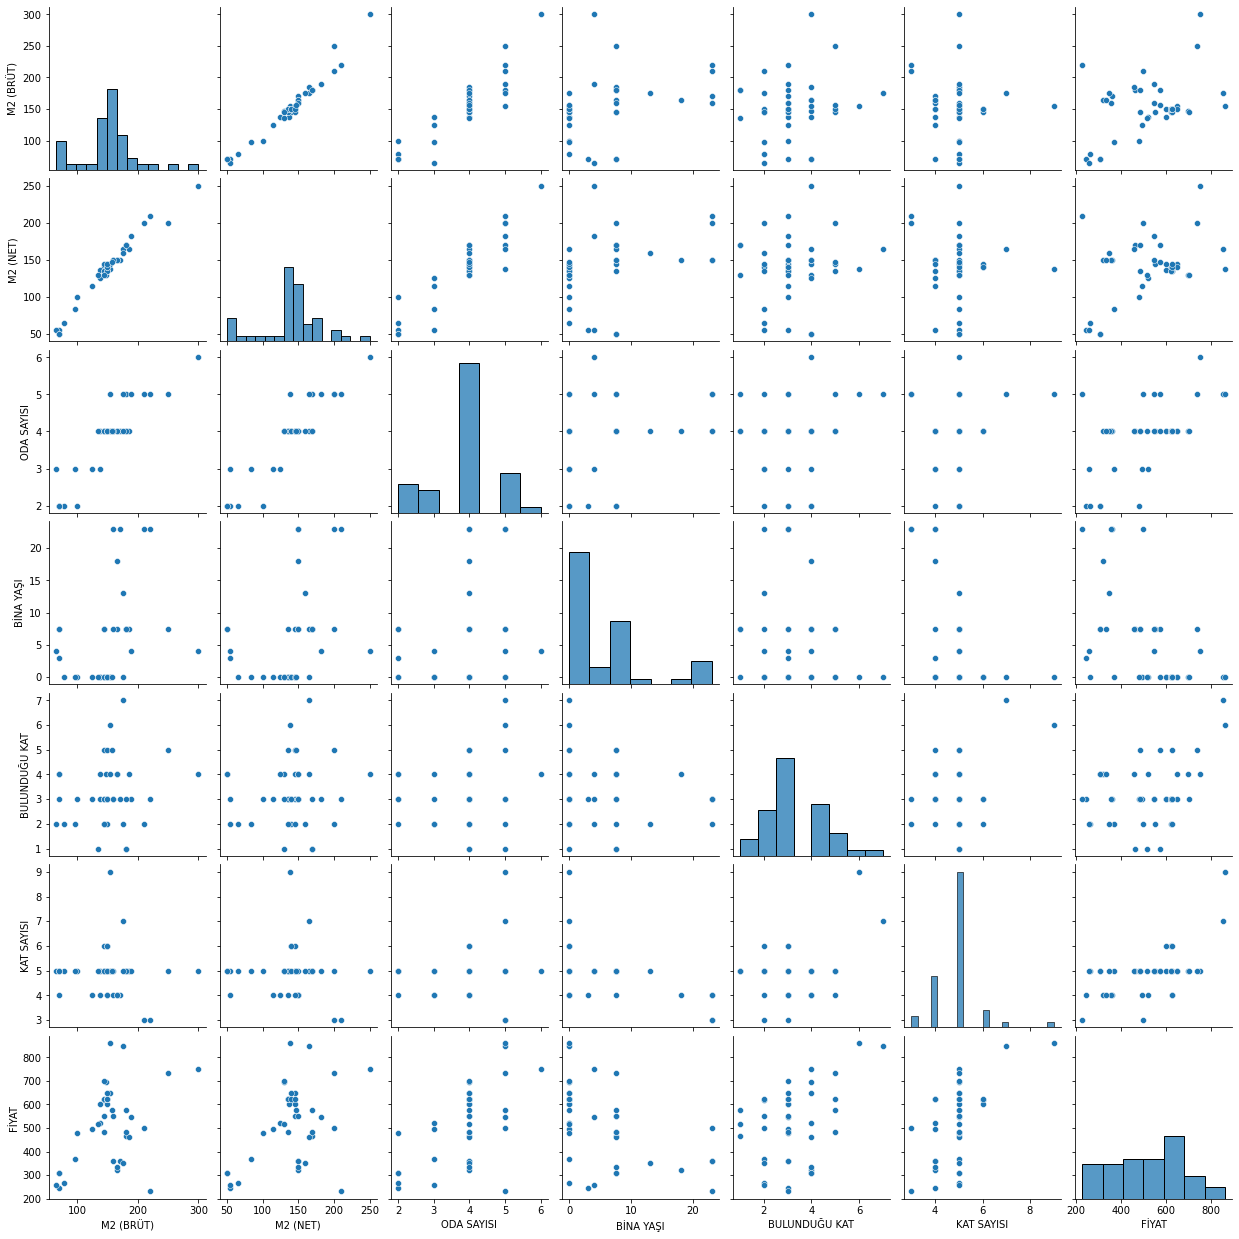

In [71]:
sbn.pairplot(cleanData)